In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import qgrid

from deepracer.tracks import TrackIO, Track
from deepracer.tracks.track_utils import track_breakdown
from deepracer.logs import CloudWatchLogs as cw, \
    SimulationLogsIO as slio, \
    NewRewardUtils as nr, \
    AnalysisUtils as au, \
    PlottingUtils as pu, \
    ActionBreakdownUtils as abu

# Ignore deprecation warnings we have no power over
import warnings
warnings.filterwarnings('ignore')

# Bulk training load

This is some slow and heavy stuff. You can download all logs from CloudWatch (or part of them if you play with `not_older_than` and `older_than` parameters that take a string representation of a date in ISO format, for instance `DD-MM-YYYY` works).

Since it can be a lot of downloading, it is commented out in here to avoid accidental runs.

Files downloaded once will not be downloaded again unless you add `force=True`.

In [17]:
#logs = cw.download_all_logs('logs/deepracer-', '/aws/robomaker/SimulationJobs')

Load every log from a folder. Every single one. This is a lot of data. If you want to save yourself some time later, below you have code to save and load all that with use of pickle.

Alternatively, `logs` returned from `download_all_logs` is a list of tuples in which first element is a path to a downloaded log file (even if it already exists, but would've been donwloaded if `force=True`), so you can use that to load logs in bulk.

In [18]:
import os
import pathlib
base_folder = '../logs'
df_list = list()
big_training_panda = None

base_path = pathlib.Path(base_folder)
stream_names = [path.name for path in base_path.glob('training*')]

for stream in stream_names:
    data = slio.load_data('%s/%s' % (base_folder, stream))
    df = slio.convert_to_pandas(data)
    df['stream'] = stream[10:]
    if big_training_panda is not None:
        big_training_panda = big_training_panda.append(df)
    else:
        big_training_panda = df

In [9]:
# Have I mentioned a lot of data? This stores the data preprocessed for time savings
# big_training_panda.to_pickle('bulk_training_set.pickle')

In [19]:
# from pandas import read_pickle

# big_training_panda = read_pickle('bulk_training_set.pickle')

In [20]:
# as usual, handle with care. Towards the end of the May race I needed 30-45 minutes to recalculate the reward.
# nr.new_reward(big_training_panda, track.center_line, 'reward.reward_sample') #, verbose=True)

In [21]:
# Below code is using stream name as part of grouping since otherwise there would be episode number collisions
big_simulation_agg = au.simulation_agg(big_training_panda, 'stream')

big_complete_ones = big_simulation_agg[big_simulation_agg['progress']==100]

new reward not found, using reward as its values


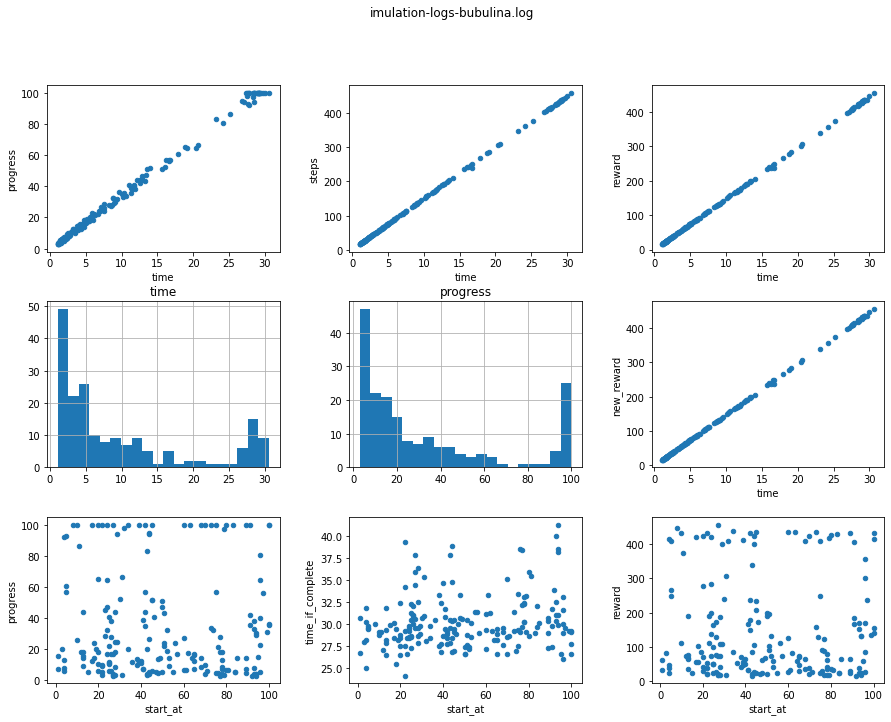

<Figure size 432x288 with 0 Axes>

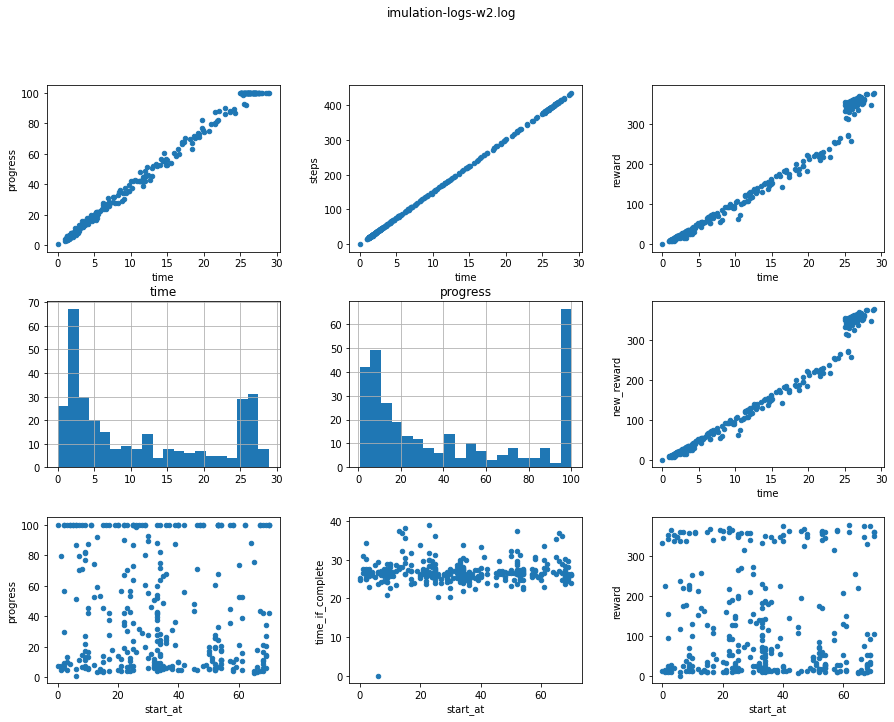

<Figure size 432x288 with 0 Axes>

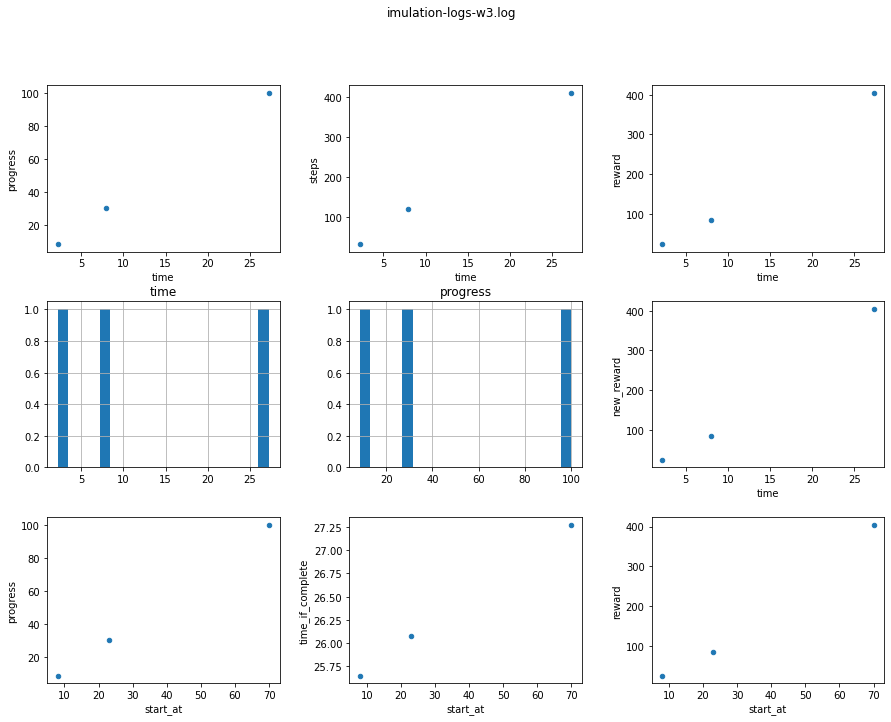

<Figure size 432x288 with 0 Axes>

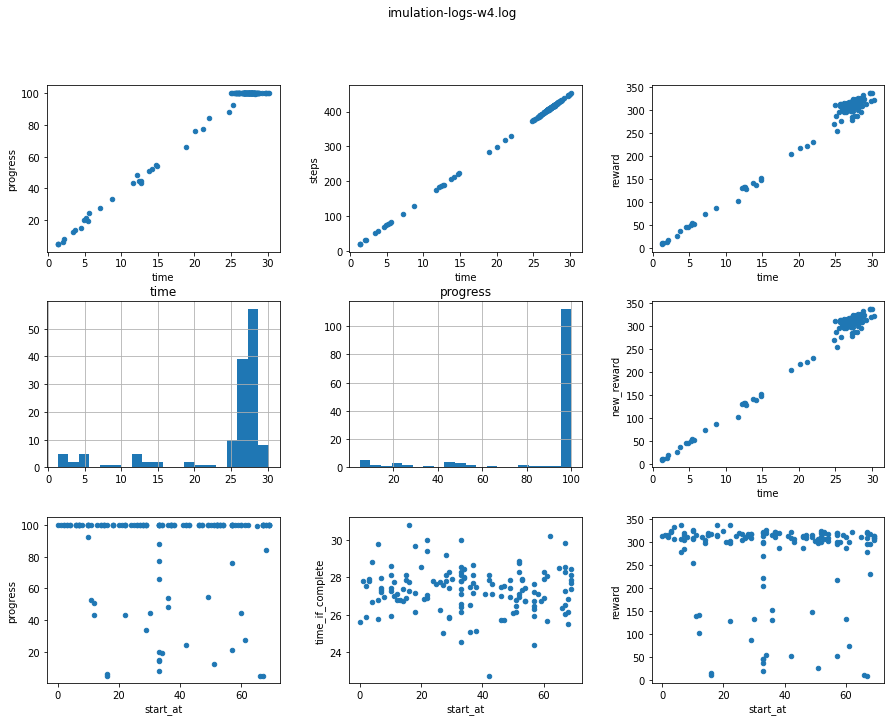

<Figure size 432x288 with 0 Axes>

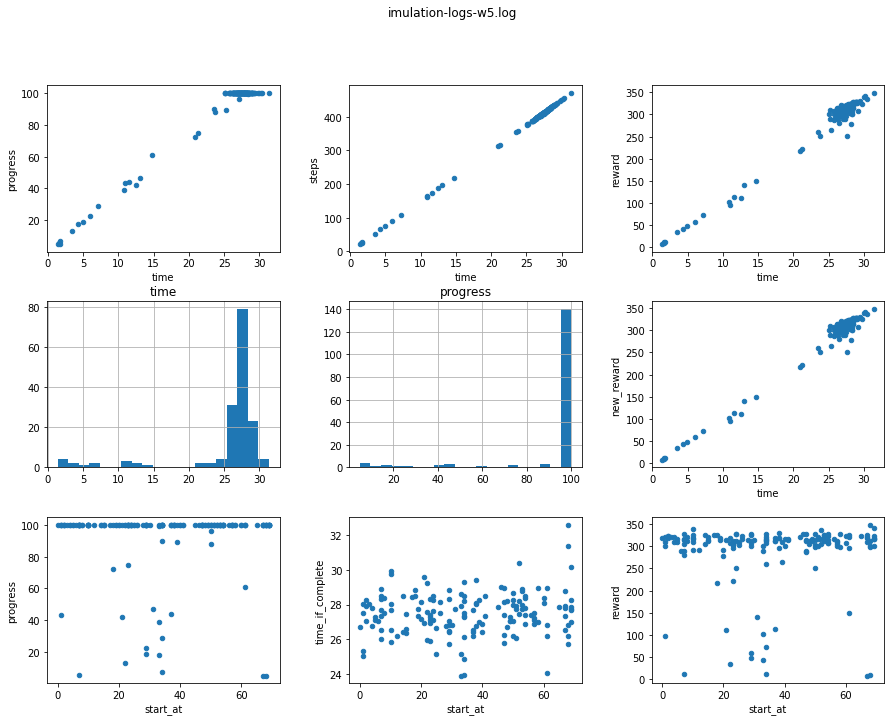

<Figure size 432x288 with 0 Axes>

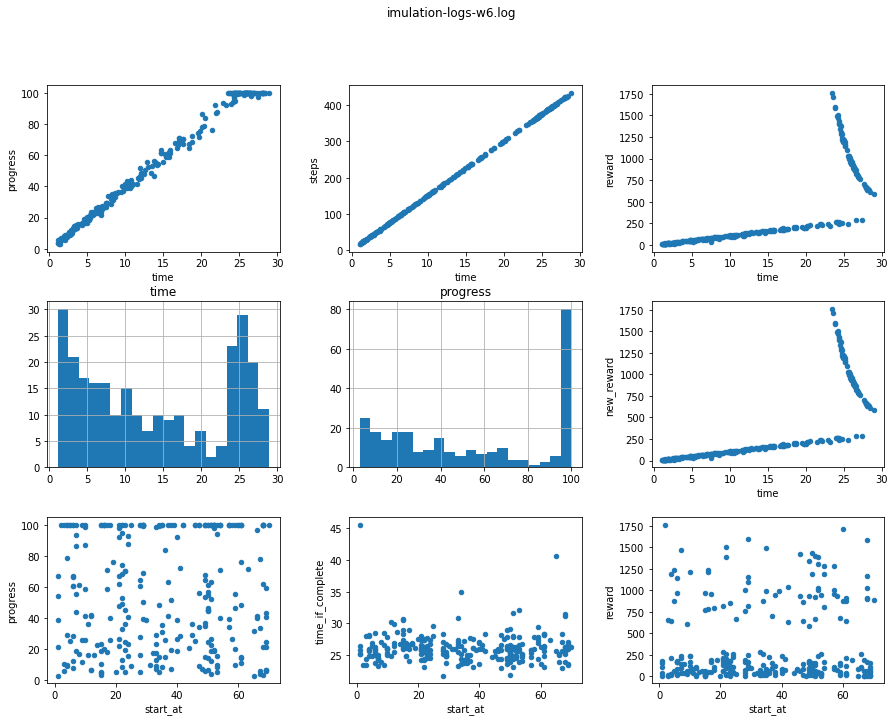

<Figure size 432x288 with 0 Axes>

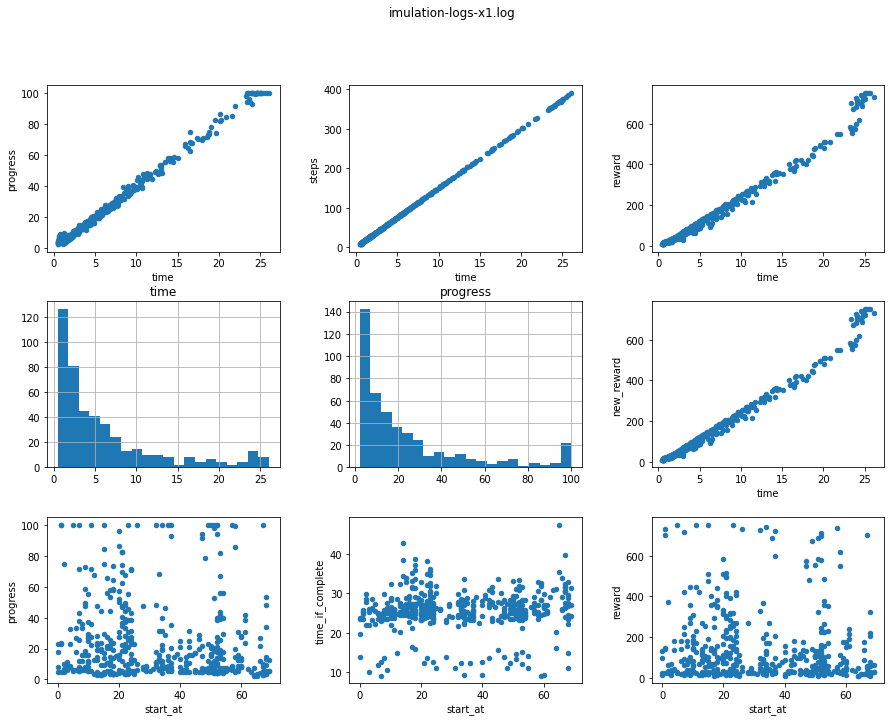

<Figure size 432x288 with 0 Axes>

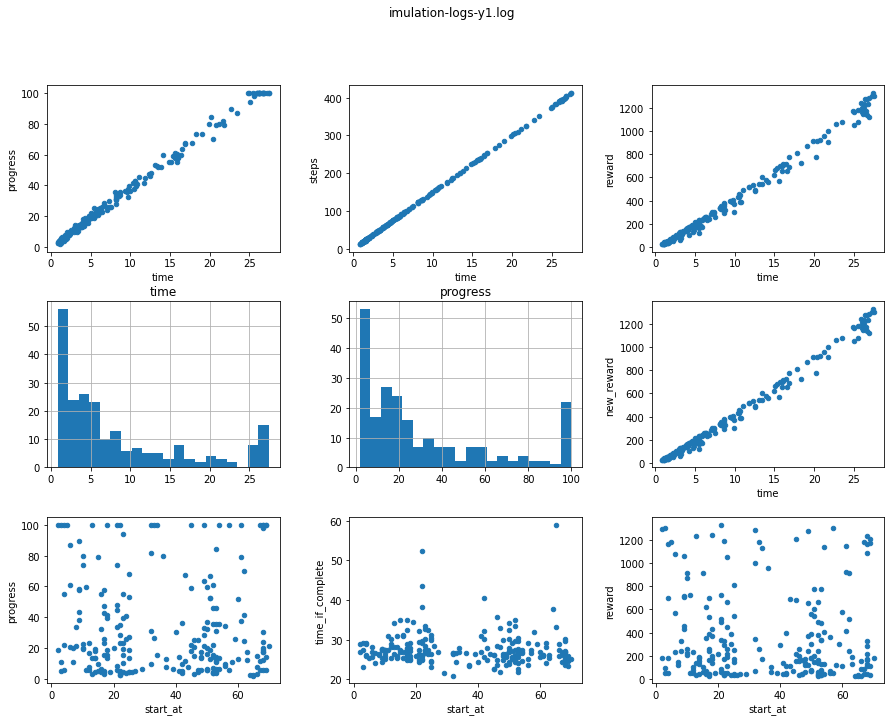

<Figure size 432x288 with 0 Axes>

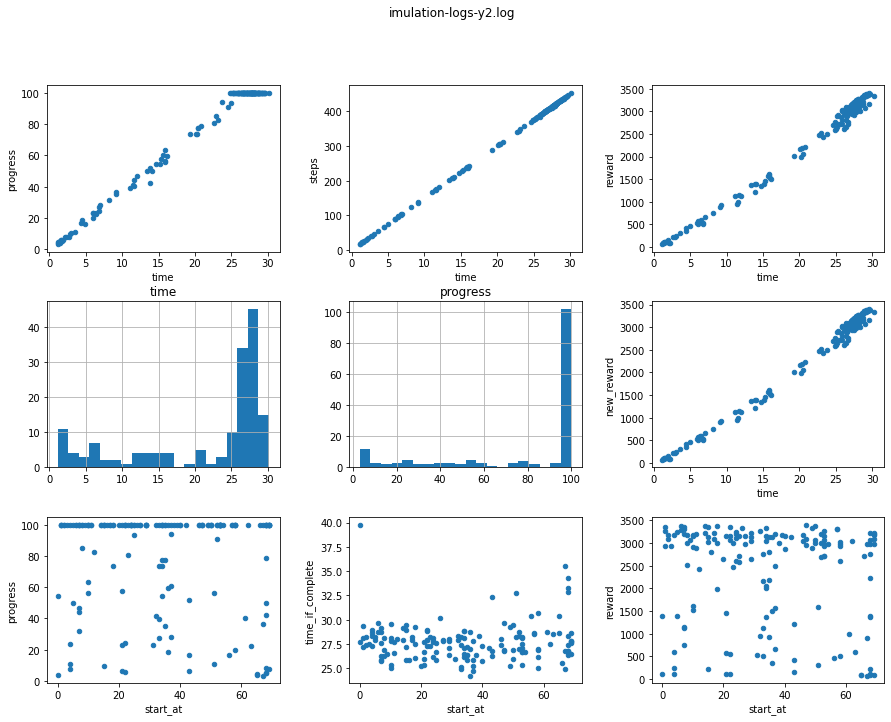

<Figure size 432x288 with 0 Axes>

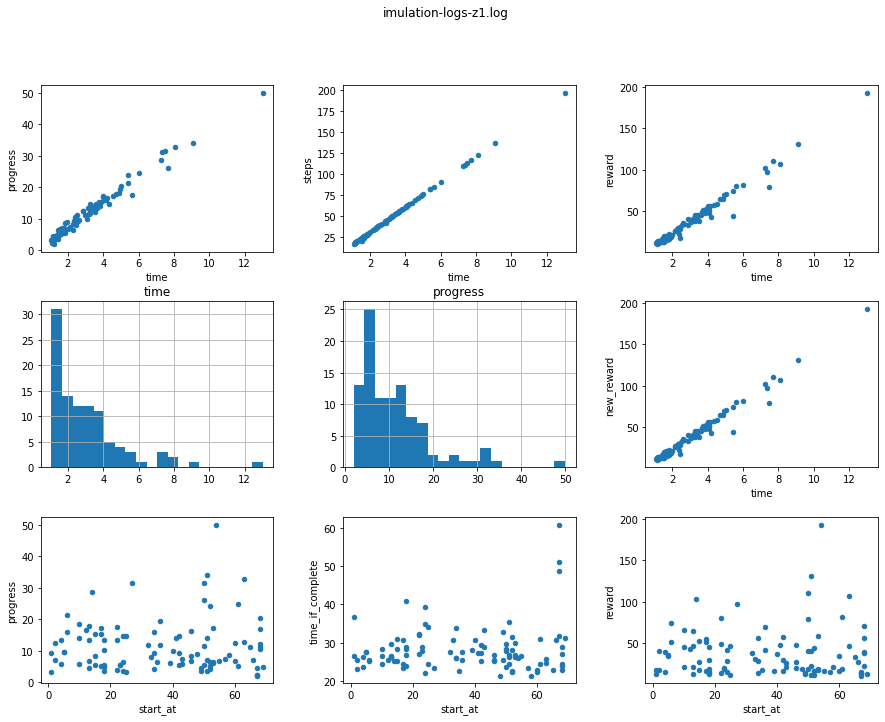

<Figure size 432x288 with 0 Axes>

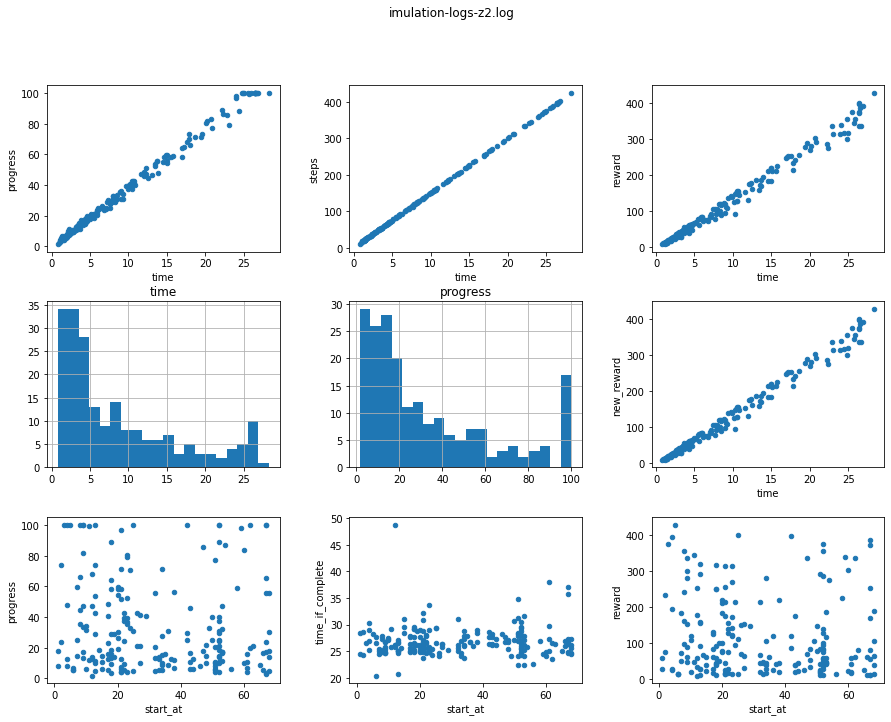

<Figure size 432x288 with 0 Axes>

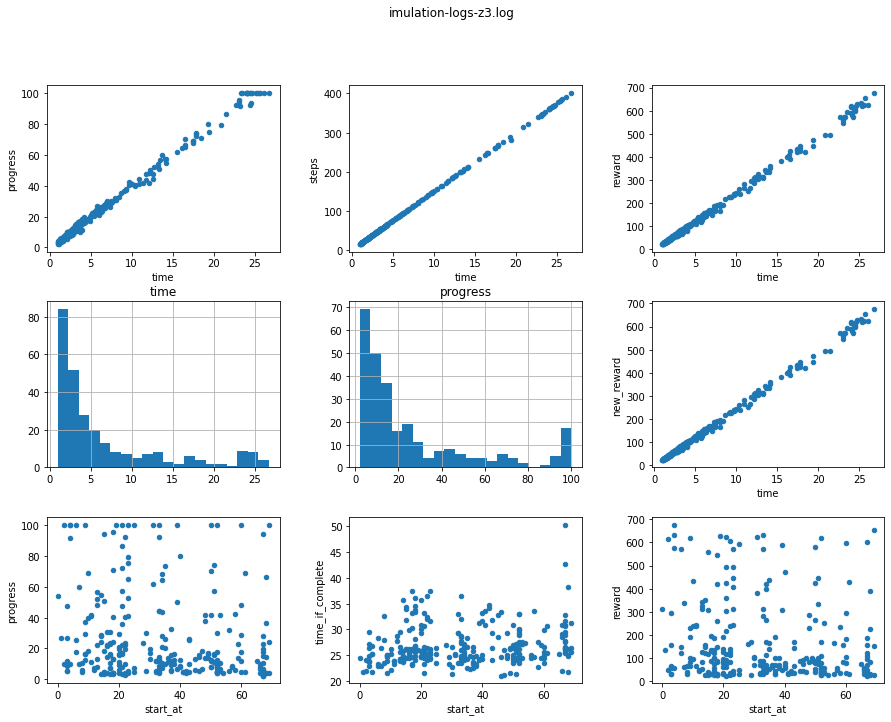

<Figure size 432x288 with 0 Axes>

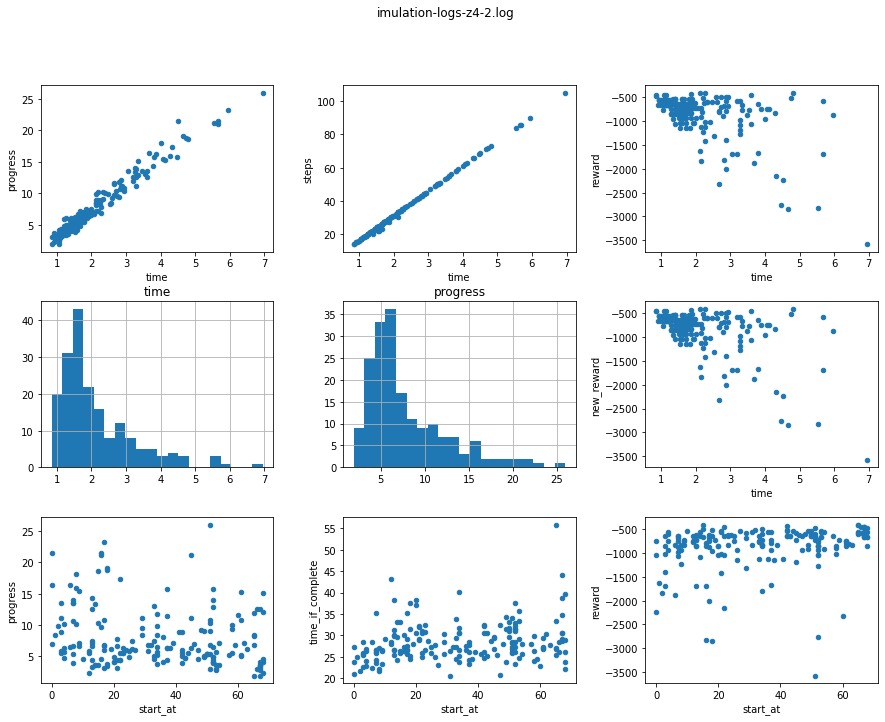

<Figure size 432x288 with 0 Axes>

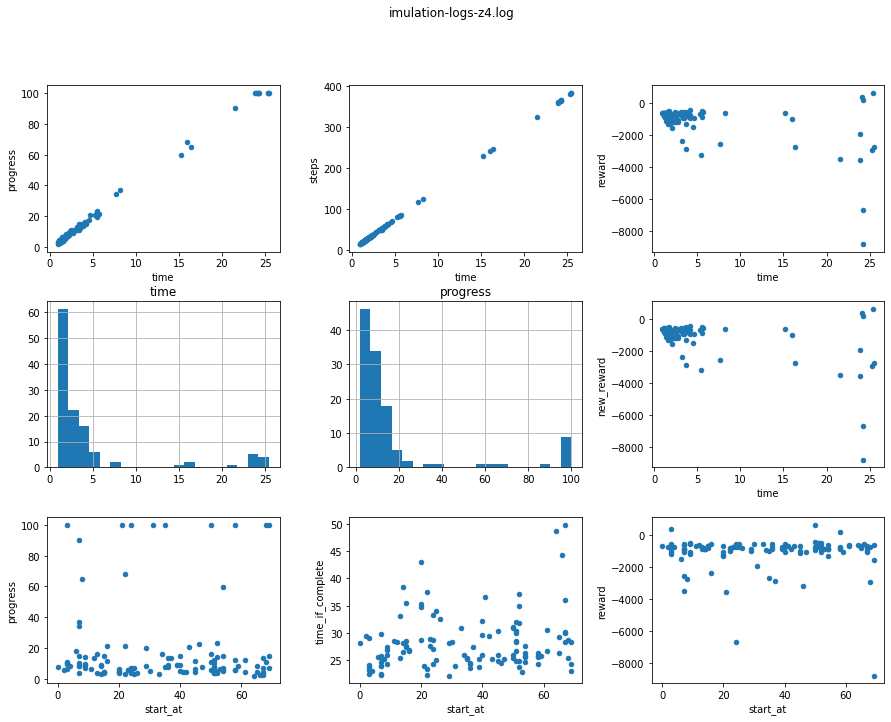

<Figure size 432x288 with 0 Axes>

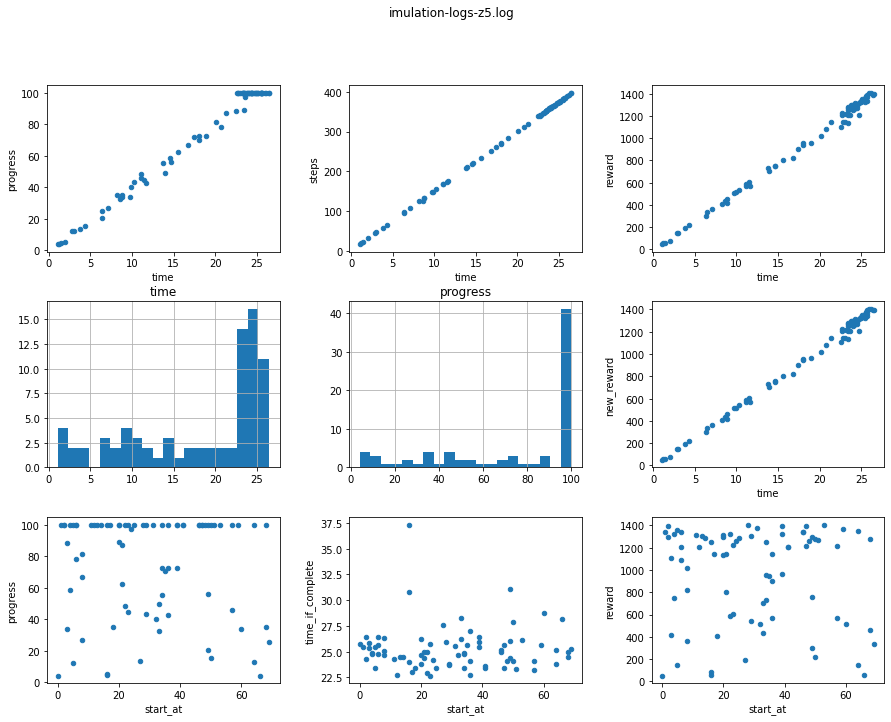

<Figure size 432x288 with 0 Axes>

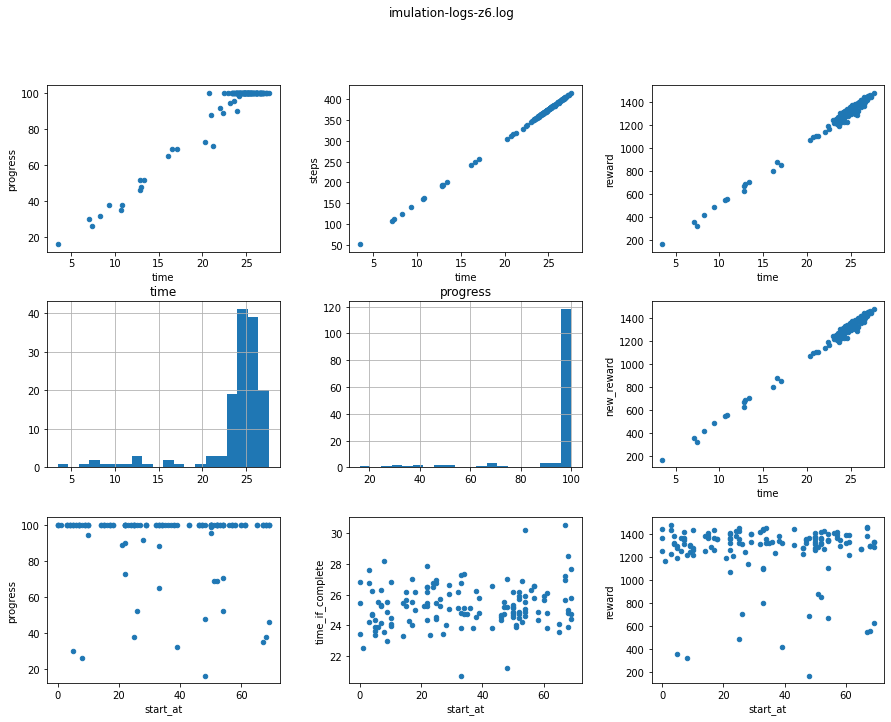

<Figure size 432x288 with 0 Axes>

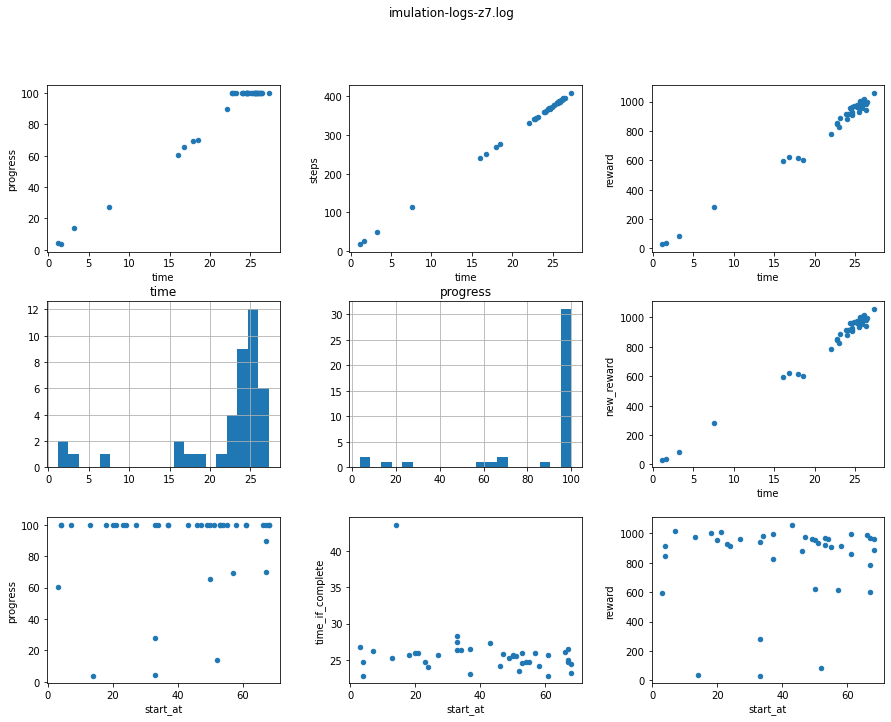

<Figure size 432x288 with 0 Axes>

In [22]:
grouped = big_simulation_agg.groupby(['stream'])

for name, group in grouped:
    au.scatter_aggregates(group, title=name)

By the end of London Loop I had so much noise and random tries that wanted to find the most promising version of my model to submit. I used the below piece of code to iterate through all the stream values to detect the one with most promising times histogram. I should've added progress as well since the fastest ones hardly ever completed a lap. I will leave adding that as an exercise for the reader.

imulation-logs-bubulina.log
imulation-logs-w2.log
imulation-logs-w3.log
imulation-logs-w4.log
imulation-logs-w5.log
imulation-logs-w6.log
imulation-logs-x1.log
imulation-logs-y1.log
imulation-logs-y2.log
imulation-logs-z2.log
imulation-logs-z3.log
imulation-logs-z4.log
imulation-logs-z5.log
imulation-logs-z6.log
imulation-logs-z7.log


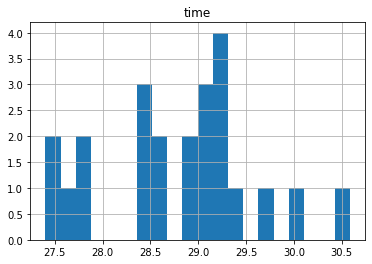

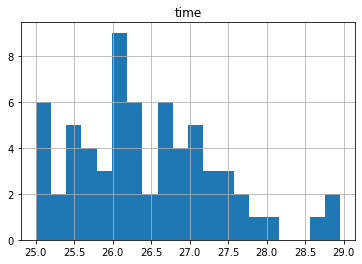

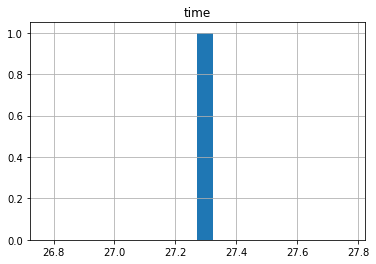

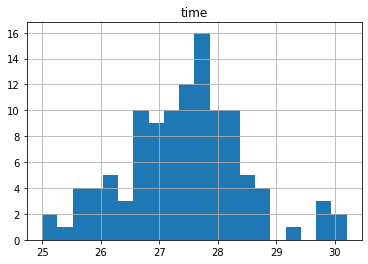

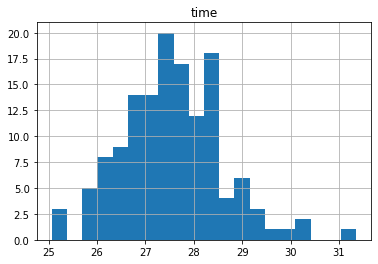

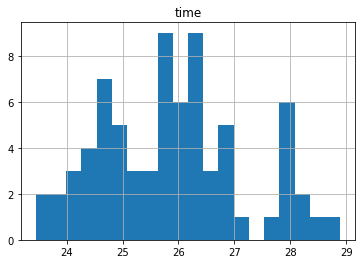

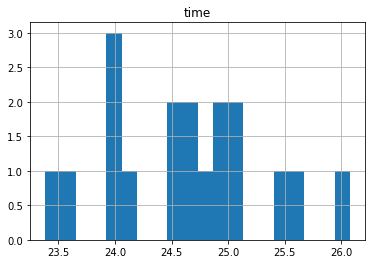

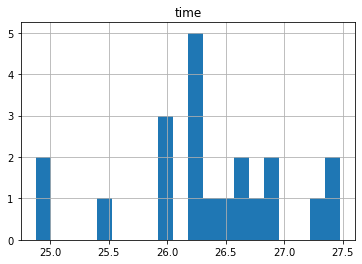

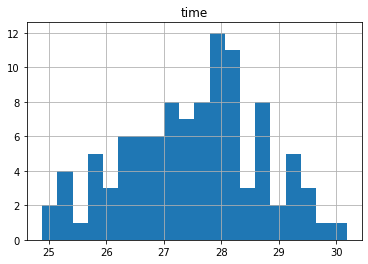

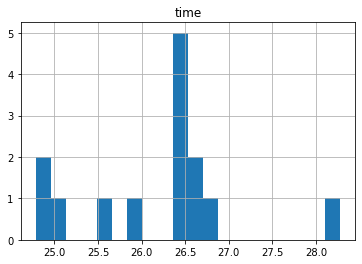

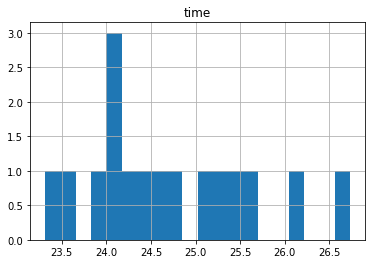

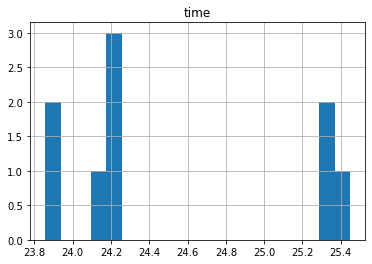

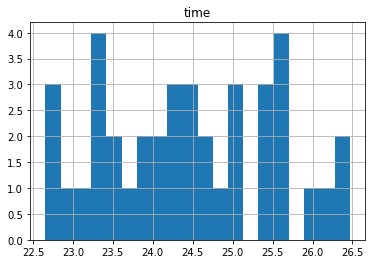

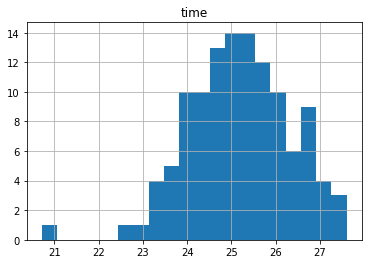

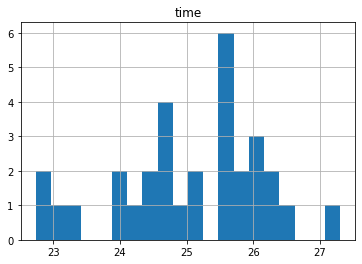

In [14]:
values = []
show = []
show_above = -1
i = 0
for value in big_complete_ones.stream.values:
    if value in values:
        continue
    values.append(value)
    if i in show or i > show_above:
        print(value)
        big_complete_ones[big_complete_ones['stream']==value].hist(column=['time'], bins=20)
    i += 1

In [15]:
# display loads of everything
qgrid.show_grid(big_simulation_agg)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…